In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/6419x-analysis2/._data
/kaggle/input/6419x-analysis2/data/._p2_unsupervised
/kaggle/input/6419x-analysis2/data/._p2_unsupervised_reduced
/kaggle/input/6419x-analysis2/data/._p1
/kaggle/input/6419x-analysis2/data/._gene_names
/kaggle/input/6419x-analysis2/data/._p2_evaluation_reduced
/kaggle/input/6419x-analysis2/data/._p2_evaluation
/kaggle/input/6419x-analysis2/data/p2_evaluation/._X_train.npy
/kaggle/input/6419x-analysis2/data/p2_evaluation/y_train.npy
/kaggle/input/6419x-analysis2/data/p2_evaluation/y_test.npy
/kaggle/input/6419x-analysis2/data/p2_evaluation/._y_train.npy
/kaggle/input/6419x-analysis2/data/p2_evaluation/._y_test.npy
/kaggle/input/6419x-analysis2/data/p2_evaluation/._X_test.npy
/kaggle/input/6419x-analysis2/data/p2_evaluation/X_test.npy
/kaggle/input/6419x-analysis2/data/p2_evaluation/X_train.npy
/kaggle/input/6419x-analysis2/data/p2_unsupervised_reduced/._X.npy
/kaggle/input/6419x-analysis2/data/p2_unsupervised_reduced/X.npy
/kaggle/input/6419x-analysi

In [3]:
#51.1

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

x = np.load('/kaggle/input/6419x-analysis2/data/p2_unsupervised/X.npy')
x.shape
X = np.log2(x+1)

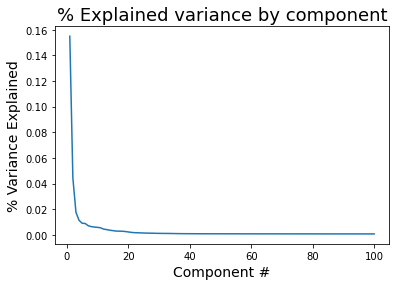

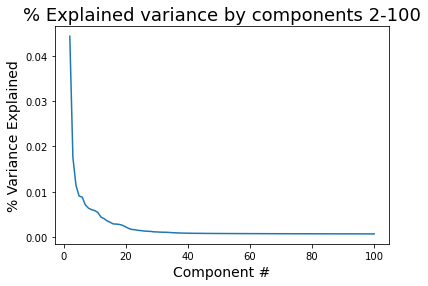

In [4]:
#pca = PCA(n_components=50,svd_solver = 'full' , random_state=0)
pca = PCA()
z=pca.fit_transform(X)


plt.plot(np.arange(1,101),pca.explained_variance_ratio_[0:100])
plt.title("% Explained variance by component",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()

plt.plot(np.arange(2,101),pca.explained_variance_ratio_[1:100])
plt.title("% Explained variance by components 2-100",size=18)
plt.xlabel("Component #",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()



In [5]:
np.sum(pca.explained_variance_ratio_[0:50])


0.33752376981355603

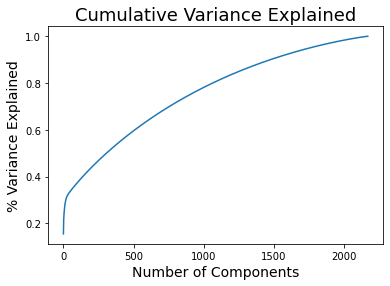

In [6]:

plt.plot(np.arange(0,2169),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Variance Explained",size=18)
plt.xlabel("Number of Components",size=14)
plt.ylabel("% Variance Explained",size=14)
plt.show()



In [7]:
np.where(np.cumsum(pca.explained_variance_ratio_) >=.85)[0][0]

1252

In [8]:
pca = PCA(n_components=1252,svd_solver = 'full' , random_state=0)
#pca = PCA()
z=pca.fit_transform(X)

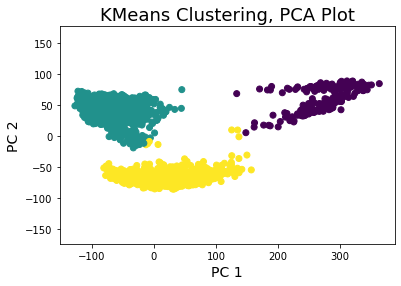

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [9]:
#51.1

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=10)

y = kmeans.fit_predict(z)
plt.scatter(z[:,0],z[:,1],c=y)
plt.title("KMeans Clustering, PCA Plot",size=18)
plt.xlabel("PC 1",size=14)
plt.ylabel("PC 2",size=14)
plt.axis("equal")
plt.show()

z.shape
y[:10]
y[:-10]

<function matplotlib.pyplot.show(close=None, block=None)>

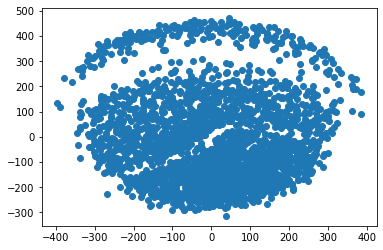

In [10]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, verbose=1, eps=1e-5)
#mds.fit(X)
mds.fit(z)
plt.scatter(mds.embedding_[:,0],mds.embedding_[:,1])
plt.show

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.002s...
[t-SNE] Computed neighbors for 2169 samples in 1.889s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 27.783540
[t-SNE] KL divergence after 250 iterations with early exaggeration: 109.146973
[t-SNE] KL divergence after 1000 iterations: 2.383195


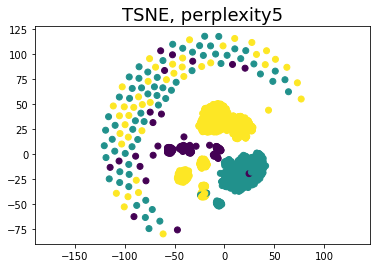

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.002s...
[t-SNE] Computed neighbors for 2169 samples in 1.847s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 32.657523
[t-SNE] KL divergence after 250 iterations with early exaggeration: 110.902771
[t-SNE] KL divergence after 1000 iterations: 2.167512


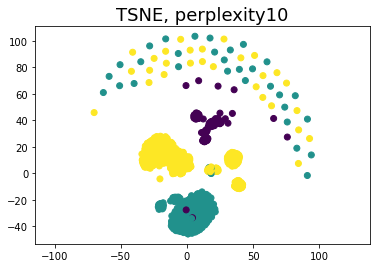

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.002s...
[t-SNE] Computed neighbors for 2169 samples in 2.285s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 40.686028
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.600784
[t-SNE] KL divergence after 1000 iterations: 1.702945


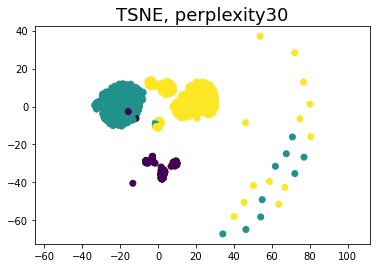

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.002s...
[t-SNE] Computed neighbors for 2169 samples in 1.925s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 44.560880
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.871895
[t-SNE] KL divergence after 1000 iterations: 1.503780


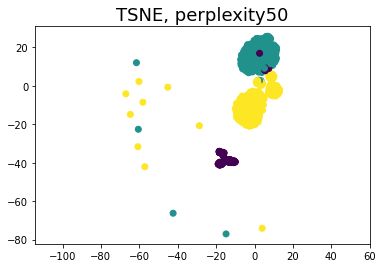

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.002s...
[t-SNE] Computed neighbors for 2169 samples in 2.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 48.275619
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.057442
[t-SNE] KL divergence after 1000 iterations: 1.303705


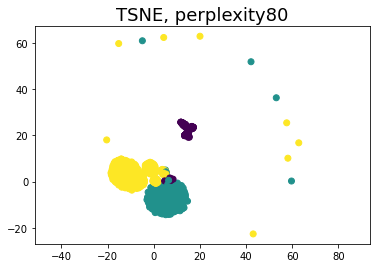

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.002s...
[t-SNE] Computed neighbors for 2169 samples in 2.411s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 50.278072
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.204422
[t-SNE] KL divergence after 1000 iterations: 1.221237


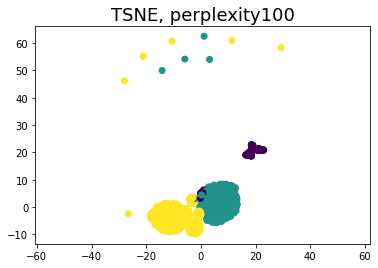

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=10)

y = kmeans.fit_predict(z)

#5,10,30,50,80,100

for perplexity in [5,10,30,50,80,100]:
    tsne = TSNE(n_components=2,verbose=1,perplexity=perplexity)
    #tsne = TSNE(perplexity=50)
    z_tsne = tsne.fit_transform(z)
    #z_tsne = tsne.fit_transform(z[:,0:10])
    plt.scatter(z_tsne[:,0],z_tsne[:,1],c=y)
    #plt.scatter(z_tsne[:,0],z_tsne[:,1])
    plt.title("TSNE, perplexity"+str(perplexity),size=18)
    plt.axis("equal")
    plt.show()

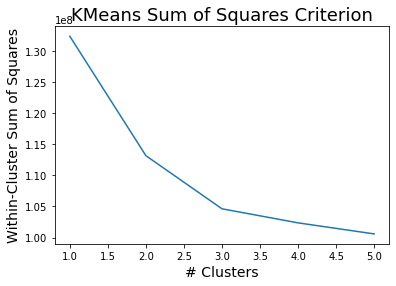

In [12]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra

plt.plot(np.arange(1,6),[KMeans(i,n_init=50).fit(z).inertia_ for i in range(1,6)])
plt.title("KMeans Sum of Squares Criterion",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares",size=14)
plt.show()
#see where it tapers off

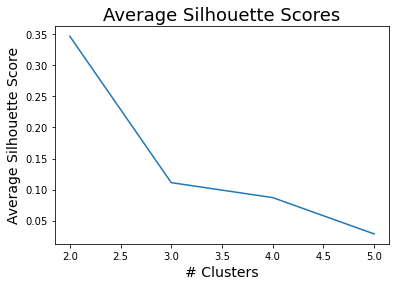

In [13]:
from sklearn.metrics import silhouette_score
plt.plot(np.arange(2,6),[silhouette_score(z,KMeans(i,n_init=50).fit(z).labels_) for i in range(2,6)])
plt.title("Average Silhouette Scores",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Average Silhouette Score",size=14)
plt.show()
#higher silhouette score is better

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

np.random.seed(317)
perm = np.random.permutation(X.shape[0])
n_train = int(4/5*X.shape[0])
print(n_train)
X_train = X[perm[:n_train]]
y_train = y[perm[:n_train]]
X_test = X[perm[n_train:]]
y_test = y[perm[n_train:]]

print(X_train.shape)

log_reg = LogisticRegression(penalty="none",multi_class="ovr").fit(X_train,y_train)
log_reg.score(X_train,y_train)



1735
(1735, 45768)


1.0

In [15]:
log_reg.score(X_test,y_test)


1.0

In [16]:
# Some solvers only support certain regularization/multi_class parameters
log_reg = LogisticRegression(penalty="l1",C=0.1,solver="liblinear",max_iter=5000,multi_class="ovr").fit(X_train,y_train)
log_reg.score(X_train,y_train)

1.0

In [17]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
log_reg.fit(X_train,y_train)
log_reg.score(X_train,y_train)


0.9971181556195965

In [18]:
log_reg.C_

array([1.  , 0.01, 0.01])

In [19]:
log_reg.scores_

{0: array([[1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        ],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816],
        [0.99423631, 0.99423631, 0.99711816, 0.99711816]]),
 1: array([[0.99423631, 0.99423631, 0.99423631, 0.99423631],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816],
        [0.99423631, 0.99423631, 0.99135447, 0.99423631],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816]]),
 2: array([[0.99423631, 0.99423631, 0.99423631, 0.99423631],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816],
        [0.99711816, 0.99711816, 0.99711816, 0.99711816],
        [1.        , 1.        , 1.        , 1.        ]])}

In [20]:
#log_reg.score(X_test,y_test)

In [21]:
#selecting features
log_reg.coef_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
#One way: look at sum of absolute value per column
arr = np.sum(np.abs(log_reg.coef_),axis=0)
top_100_coef = arr.argsort()[-100:][::-1]
top_100_coef.shape
top_100_coef[:10]

array([ 8586,  8589, 41782,  8667, 38286,  3114, 40470, 25332, 40741,
        9356])

In [23]:
xeval_train = np.load('/kaggle/input/6419x-analysis2/data/p2_evaluation/X_train.npy')
Xeval_train = np.log2(xeval_train+1)
yeval_train = np.load('/kaggle/input/6419x-analysis2/data/p2_evaluation/y_train.npy')

log_reg = LogisticRegressionCV(cv=5,Cs=[0.001,0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
#log_reg.fit(X_train[:,np.array([0,12])],y_train)
log_reg.fit(Xeval_train[:,top_100_coef],yeval_train)


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr', penalty='l1', solver='liblinear')

In [24]:
log_reg.score(Xeval_train[:,top_100_coef],yeval_train)

0.968430826369545

In [25]:
xeval_test = np.load('/kaggle/input/6419x-analysis2/data/p2_evaluation/X_test.npy')
Xeval_test = np.log2(xeval_test+1)
yeval_test = np.load('/kaggle/input/6419x-analysis2/data/p2_evaluation/y_test.npy')

log_reg.score(Xeval_test[:,top_100_coef],yeval_test)

0.7996389891696751

In [26]:
perm = np.random.permutation(X.shape[1])
perm100 = perm[:100]
perm100.shape

(100,)

In [40]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.001,0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
#log_reg.fit(X_train[:,np.array([4,5])],y_train)
log_reg.fit(Xeval_train[:,perm100],yeval_train)


LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr', penalty='l1', solver='liblinear')

In [41]:
log_reg.score(Xeval_train[:,perm100],yeval_train)

0.3853296193129062

In [42]:
log_reg.score(Xeval_test[:,perm100],yeval_test)

0.27075812274368233

In [31]:
#100 genes with highest variance
vararr = np.var(X_train, axis=0)
print(vararr.shape)
top_100_var = vararr.argsort()[-100:][::-1]
top_100_var.shape

(45768,)


(100,)

In [32]:
log_reg = LogisticRegressionCV(cv=5,Cs=[0.001,0.01,0.1,1,10],max_iter=5000,penalty="l1",solver="liblinear",multi_class="ovr")
#log_reg.fit(X_train[:,np.array([4,5])],y_train)
log_reg.fit(Xeval_train[:,top_100_var],yeval_train)

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], cv=5, max_iter=5000,
                     multi_class='ovr', penalty='l1', solver='liblinear')

In [33]:
log_reg.score(Xeval_train[:,top_100_var],yeval_train)

0.9965417867435159

In [34]:
log_reg.score(Xeval_test[:,top_100_var],yeval_test)

1.0

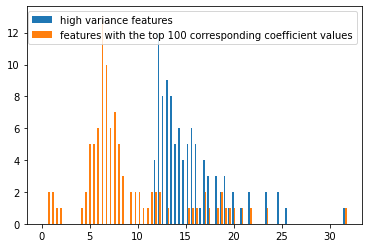

In [66]:
vartop_100_var = np.var(Xeval_train[:,top_100_var], axis=0)
varperm100 = np.var(Xeval_train[:,perm100], axis=0)
vartop_100_coef = np.var(Xeval_train[:,top_100_coef], axis=0)
 
bins = np.linspace(0, vartop_100_var.max(), 75)

plt.hist([vartop_100_var, vartop_100_coef], bins, label=['high variance features', 'features with the top 100 corresponding coefficient values'])
plt.legend(loc='upper right')
plt.show()